In [1]:
# those modules are almost always imported when working with model data
%matplotlib inline
import matplotlib.pyplot as plt # general plotting
import cartopy.crs as ccrs # plot on maps, better than the Basemap module
import numpy as np
import xarray as xr # major tool to work with NetCDF data

# get gamap's WhGrYlRd color scheme from file
from matplotlib.colors import ListedColormap
WhGrYlRd_scheme = np.genfromtxt('./WhGrYlRd.txt', delimiter=' ')
WhGrYlRd = ListedColormap(WhGrYlRd_scheme/255.0)

# Open file and perform basic computation

In [2]:
ds = xr.open_dataset("initial_GEOSChem_rst.4x5_tropchem.nc")
ds # same as print(ds) in IPython/Jupyter environment

<xarray.Dataset>
Dimensions:     (lat: 46, lev: 47, lon: 72, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2005-07-01
  * lev         (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
  * lat         (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 ...
  * lon         (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 ...
Data variables:
    TRC_NO      (time, lev, lat, lon) float32 ...
    TRC_O3      (time, lev, lat, lon) float32 ...
    TRC_PAN     (time, lev, lat, lon) float32 ...
    TRC_CO      (time, lev, lat, lon) float32 ...
    TRC_ALK4    (time, lev, lat, lon) float32 ...
    TRC_ISOP    (time, lev, lat, lon) float32 ...
    TRC_HNO3    (time, lev, lat, lon) float32 ...
    TRC_H2O2    (time, lev, lat, lon) float32 ...
    TRC_ACET    (time, lev, lat, lon) float32 ...
    TRC_MEK     (time, lev, lat, lon) float32 ...
    TRC_ALD2    (time, lev, lat, lon) float32 ...
    TRC_RCHO    (time, lev, lat, lon) float32 ...
    TRC_MVK     (time, le

In [3]:
ds.dims

Frozen(SortedKeysDict({'time': 1, 'lev': 47, 'lat': 46, 'lon': 72}))

In [4]:
ds = ds.squeeze() # remove the redundant time dimension
ds.dims

Frozen(SortedKeysDict(OrderedDict([('lev', 47), ('lat', 46), ('lon', 72)])))

In [5]:
ds['TRC_O3']

<xarray.DataArray 'TRC_O3' (lev: 47, lat: 46, lon: 72)>
[155664 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer
    units:      mol/mol

In [6]:
ds['TRC_O3'].units

'mol/mol'

In [7]:
rawdata = ds['TRC_O3'].values # get pure numpy array
print(type(rawdata), rawdata.shape)

<class 'numpy.ndarray'> (47, 46, 72)


In [8]:
rawdata[0,:,:] # short-cut: rawdata[0]

array([[2.6152373e-08, 2.6152373e-08, 2.6152373e-08, ..., 2.6152373e-08,
        2.6152373e-08, 2.6152373e-08],
       [2.6224114e-08, 2.6226319e-08, 2.6230103e-08, ..., 2.6205269e-08,
        2.6221985e-08, 2.6201750e-08],
       [2.5707591e-08, 2.5481674e-08, 2.5132504e-08, ..., 2.5927429e-08,
        2.5662809e-08, 2.5705889e-08],
       ...,
       [8.5884935e-09, 9.0131822e-09, 8.7934664e-09, ..., 8.6507690e-09,
        8.0411748e-09, 8.1592724e-09],
       [6.4695747e-09, 6.4698038e-09, 6.4658954e-09, ..., 6.4761974e-09,
        6.4768559e-09, 6.4735235e-09],
       [6.4600822e-09, 6.4600822e-09, 6.4600822e-09, ..., 6.4600822e-09,
        6.4600822e-09, 6.4600822e-09]], dtype=float32)

In [9]:
ds['TRC_O3'][0,:,:] 

<xarray.DataArray 'TRC_O3' (lat: 46, lon: 72)>
array([[2.615237e-08, 2.615237e-08, 2.615237e-08, ..., 2.615237e-08,
        2.615237e-08, 2.615237e-08],
       [2.622411e-08, 2.622632e-08, 2.623010e-08, ..., 2.620527e-08,
        2.622198e-08, 2.620175e-08],
       [2.570759e-08, 2.548167e-08, 2.513250e-08, ..., 2.592743e-08,
        2.566281e-08, 2.570589e-08],
       ...,
       [8.588493e-09, 9.013182e-09, 8.793466e-09, ..., 8.650769e-09,
        8.041175e-09, 8.159272e-09],
       [6.469575e-09, 6.469804e-09, 6.465895e-09, ..., 6.476197e-09,
        6.476856e-09, 6.473523e-09],
       [6.460082e-09, 6.460082e-09, 6.460082e-09, ..., 6.460082e-09,
        6.460082e-09, 6.460082e-09]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
    lev      float32 0.9924996
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer
    units

In [10]:
ds['TRC_O3'].isel(lev=0)

<xarray.DataArray 'TRC_O3' (lat: 46, lon: 72)>
array([[2.615237e-08, 2.615237e-08, 2.615237e-08, ..., 2.615237e-08,
        2.615237e-08, 2.615237e-08],
       [2.622411e-08, 2.622632e-08, 2.623010e-08, ..., 2.620527e-08,
        2.622198e-08, 2.620175e-08],
       [2.570759e-08, 2.548167e-08, 2.513250e-08, ..., 2.592743e-08,
        2.566281e-08, 2.570589e-08],
       ...,
       [8.588493e-09, 9.013182e-09, 8.793466e-09, ..., 8.650769e-09,
        8.041175e-09, 8.159272e-09],
       [6.469575e-09, 6.469804e-09, 6.465895e-09, ..., 6.476197e-09,
        6.476856e-09, 6.473523e-09],
       [6.460082e-09, 6.460082e-09, 6.460082e-09, ..., 6.460082e-09,
        6.460082e-09, 6.460082e-09]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
    lev      float32 0.9924996
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer
    units

In [11]:
ds['TRC_O3'].isel(lat=11) # equivalent to ds['TRC_O3'][:,11,:]

<xarray.DataArray 'TRC_O3' (lev: 47, lon: 72)>
array([[2.468249e-08, 2.464781e-08, 2.509135e-08, ..., 2.657155e-08,
        2.441219e-08, 2.495699e-08],
       [2.471466e-08, 2.467079e-08, 2.510734e-08, ..., 2.664918e-08,
        2.465703e-08, 2.500014e-08],
       [2.476983e-08, 2.470628e-08, 2.512945e-08, ..., 2.671374e-08,
        2.480054e-08, 2.506936e-08],
       ...,
       [1.365734e-06, 1.340361e-06, 1.316212e-06, ..., 1.299043e-06,
        1.330725e-06, 1.369251e-06],
       [3.900916e-07, 3.923182e-07, 3.956695e-07, ..., 3.888709e-07,
        3.922958e-07, 3.909676e-07],
       [1.078088e-07, 1.087635e-07, 1.094741e-07, ..., 1.069314e-07,
        1.062586e-07, 1.066553e-07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
    lat      float32 -46.0
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer
    units:      mol/

In [12]:
ds['TRC_O3'].sel(lat=-46)

<xarray.DataArray 'TRC_O3' (lev: 47, lon: 72)>
array([[2.468249e-08, 2.464781e-08, 2.509135e-08, ..., 2.657155e-08,
        2.441219e-08, 2.495699e-08],
       [2.471466e-08, 2.467079e-08, 2.510734e-08, ..., 2.664918e-08,
        2.465703e-08, 2.500014e-08],
       [2.476983e-08, 2.470628e-08, 2.512945e-08, ..., 2.671374e-08,
        2.480054e-08, 2.506936e-08],
       ...,
       [1.365734e-06, 1.340361e-06, 1.316212e-06, ..., 1.299043e-06,
        1.330725e-06, 1.369251e-06],
       [3.900916e-07, 3.923182e-07, 3.956695e-07, ..., 3.888709e-07,
        3.922958e-07, 3.909676e-07],
       [1.078088e-07, 1.087635e-07, 1.094741e-07, ..., 1.069314e-07,
        1.062586e-07, 1.066553e-07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
    lat      float32 -46.0
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer
    units:      mol/

# Basic plotting

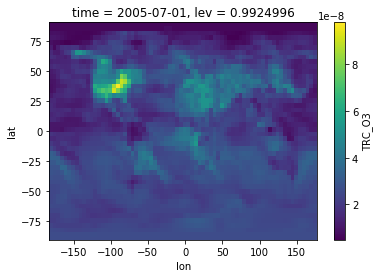

In [13]:
ds['TRC_O3'][0].plot();

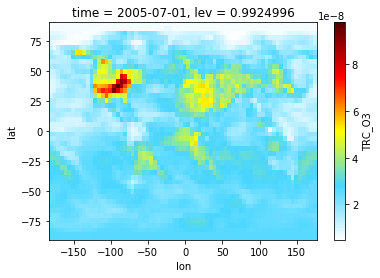

In [14]:
ds['TRC_O3'][0].plot(cmap=WhGrYlRd);

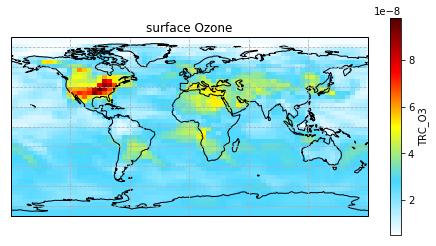

In [15]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')
ds['TRC_O3'][0].plot(ax=ax, cmap=WhGrYlRd)
ax.set_title('surface Ozone');

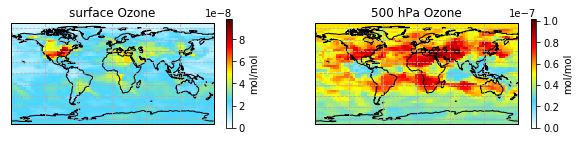

In [16]:
fig, axes = plt.subplots(1, 2, figsize=[10, 4], subplot_kw={'projection': ccrs.PlateCarree()})

ds['TRC_O3'][0].plot(ax=axes[0], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[0].set_title('surface Ozone')

ds['TRC_O3'][22].plot(ax=axes[1], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[1].set_title('500 hPa Ozone')

for ax in axes:
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
plt.savefig('Ozone.png', dpi=300)

In [17]:
ls Ozone.png

Ozone.png


# Interactive exploration

In [18]:
varnames = list(ds.data_vars.keys())
nvar = len(varnames)
print(nvar)
print(varnames)

66
['TRC_NO', 'TRC_O3', 'TRC_PAN', 'TRC_CO', 'TRC_ALK4', 'TRC_ISOP', 'TRC_HNO3', 'TRC_H2O2', 'TRC_ACET', 'TRC_MEK', 'TRC_ALD2', 'TRC_RCHO', 'TRC_MVK', 'TRC_MACR', 'TRC_PMN', 'TRC_PPN', 'TRC_R4N2', 'TRC_PRPE', 'TRC_C3H8', 'TRC_CH2O', 'TRC_C2H6', 'TRC_N2O5', 'TRC_HNO4', 'TRC_MP', 'TRC_DMS', 'TRC_SO2', 'TRC_SO4', 'TRC_SO4s', 'TRC_MSA', 'TRC_NH3', 'TRC_NH4', 'TRC_NIT', 'TRC_NITs', 'TRC_BCPI', 'TRC_OCPI', 'TRC_BCPO', 'TRC_OCPO', 'TRC_DST1', 'TRC_DST2', 'TRC_DST3', 'TRC_DST4', 'TRC_SALA', 'TRC_SALC', 'TRC_Br2', 'TRC_Br', 'TRC_BrO', 'TRC_HOBr', 'TRC_HBr', 'TRC_BrNO2', 'TRC_BrNO3', 'TRC_CHBr3', 'TRC_CH2Br2', 'TRC_CH3Br', 'TRC_MPN', 'TRC_ISOPN', 'TRC_MOBA', 'TRC_PROPNN', 'TRC_HAC', 'TRC_GLYC', 'TRC_MMN', 'TRC_RIP', 'TRC_IEPOX', 'TRC_MAP', 'TRC_NO2', 'TRC_NO3', 'TRC_HNO2']


In [19]:
def plot_layer(var, l):
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds[var][l-1].plot(ax=ax, cmap=WhGrYlRd)
    ax.set_title(var+f'; lev={l}')

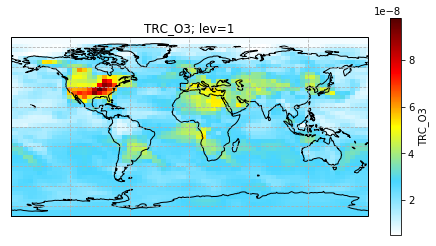

In [20]:
plot_layer('TRC_O3', 1)

In [21]:
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown

In [22]:
interact(plot_layer, 
         var=SelectionSlider(options=varnames, continuous_update=False), 
         l=IntSlider(min=1, max=47, step=1, continuous_update=False),
        );

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('TRC_NO', 'TRC_O3',…

In [23]:
interact(plot_layer, 
         var=Dropdown(options=varnames), 
         l=IntSlider(min=1, max=47, step=1, continuous_update=False),
         continuous_update=False);

interactive(children=(Dropdown(description='var', options=('TRC_NO', 'TRC_O3', 'TRC_PAN', 'TRC_CO', 'TRC_ALK4'…

# Vertical profile

In [24]:
dr_zm = ds['TRC_O3'].mean(dim=['lon'])
dr_zm 

<xarray.DataArray 'TRC_O3' (lev: 47, lat: 46)>
array([[2.615237e-08, 2.619495e-08, 2.572524e-08, ..., 1.047932e-08,
        6.539298e-09, 6.460083e-09],
       [2.632851e-08, 2.634136e-08, 2.629818e-08, ..., 1.343438e-08,
        1.079424e-08, 1.084715e-08],
       [2.649893e-08, 2.648492e-08, 2.658056e-08, ..., 1.714644e-08,
        1.834208e-08, 1.830816e-08],
       ...,
       [1.551953e-06, 1.551953e-06, 1.684738e-06, ..., 1.055535e-06,
        1.060827e-06, 1.060827e-06],
       [2.190117e-07, 2.190116e-07, 2.219772e-07, ..., 2.504258e-07,
        2.484376e-07, 2.484376e-07],
       [5.993883e-08, 5.993882e-08, 6.047662e-08, ..., 6.869855e-08,
        6.832266e-08, 6.832266e-08]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...

In [25]:
ds['TRC_O3'].values.mean(axis=2)

array([[2.6152374e-08, 2.6194947e-08, 2.5725237e-08, ..., 1.0479322e-08,
        6.5392984e-09, 6.4600831e-09],
       [2.6328509e-08, 2.6341358e-08, 2.6298183e-08, ..., 1.3434382e-08,
        1.0794238e-08, 1.0847146e-08],
       [2.6498927e-08, 2.6484916e-08, 2.6580560e-08, ..., 1.7146444e-08,
        1.8342080e-08, 1.8308159e-08],
       ...,
       [1.5519535e-06, 1.5519535e-06, 1.6847375e-06, ..., 1.0555354e-06,
        1.0608269e-06, 1.0608269e-06],
       [2.1901165e-07, 2.1901162e-07, 2.2197719e-07, ..., 2.5042578e-07,
        2.4843760e-07, 2.4843760e-07],
       [5.9938827e-08, 5.9938820e-08, 6.0476616e-08, ..., 6.8698554e-08,
        6.8322663e-08, 6.8322663e-08]], dtype=float32)

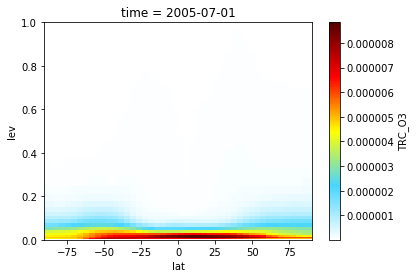

In [26]:
dr_zm.plot(cmap=WhGrYlRd)

In [27]:
dr_zm['lev']

<xarray.DataArray 'lev' (lev: 47)>
array([9.924996e-01, 9.774562e-01, 9.623704e-01, 9.472854e-01, 9.322005e-01,
       9.171155e-01, 9.020311e-01, 8.869475e-01, 8.718643e-01, 8.567811e-01,
       8.416982e-01, 8.266159e-01, 8.090211e-01, 7.863999e-01, 7.612653e-01,
       7.361340e-01, 7.110056e-01, 6.858778e-01, 6.544709e-01, 6.167904e-01,
       5.791153e-01, 5.414491e-01, 5.037952e-01, 4.661533e-01, 4.285283e-01,
       3.909265e-01, 3.533493e-01, 3.098539e-01, 2.635869e-01, 2.237725e-01,
       1.900607e-01, 1.615131e-01, 1.372873e-01, 1.166950e-01, 9.919107e-02,
       8.431271e-02, 6.655886e-02, 4.764090e-02, 3.381392e-02, 2.375519e-02,
       1.434238e-02, 6.587537e-03, 2.816391e-03, 1.109100e-03, 3.987841e-04,
       1.269931e-04, 2.763413e-05], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-07-01
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
Attributes:
    long_name:  Eta Centers
    units:      sigma_level
    positive:   up
    axis: 


```python
dr_zm['lev'] = np.arange(47)
```

In [28]:
lev_indices = np.arange(47)
lev_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

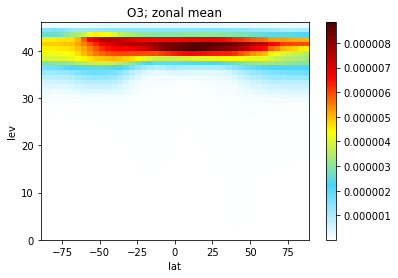

In [29]:
plt.pcolor(dr_zm['lat'], lev_indices, dr_zm, cmap=WhGrYlRd)
plt.xlabel('lat')
plt.ylabel('lev')
plt.colorbar()
plt.title('O3; zonal mean')

In [30]:
@interact(var=SelectionSlider(options=varnames, continuous_update=False))
def plot_zonal_mean(var):
    plt.pcolor(ds['lat'], lev_indices, ds[var].mean(dim=['lon']), cmap=WhGrYlRd)
    plt.xlabel('lat')
    plt.ylabel('lev')
    plt.colorbar()
    plt.title(var)

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('TRC_NO', 'TRC_O3',…

In [31]:
@interact(var=SelectionSlider(options=varnames, continuous_update=False),
          i=IntSlider(min=1, max=72, step=1, continuous_update=False),)
def plot_cross_section(var, i):
    plt.pcolor(ds['lat'], lev_indices, ds[var].isel(lon=i-1), cmap=WhGrYlRd)
    plt.xlabel('lat')
    plt.ylabel('lev')
    plt.title(var+f" ;lon = {ds['lon'].values[i-1]}")

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('TRC_NO', 'TRC_O3',…